In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Lecture de données à partir de fichier csv.

J'ai utilisé pandas pour lire les données car si la taille de données est grande, numpy et open ne marche pas bien.
Les données sont ainsi enregistrées sous la forme DataFrame.

In [71]:
train_set = pd.read_csv('train.csv')

# Séparation des variables et des étiquettes (labels)

In [72]:
Y = train_set['Cover_Type']
del train_set['Cover_Type']
del train_set['Id']

# Tester différents types de classifieurs

Comparer les classifieurs classiques pour choisir le meilleur, ou les meilleurs à utiliser dans la suite.

     * Arbre de Décision
     * K plus proche voisin
     * SVM
     * Perceptron

Deux modèles d'ensemble sont:

     * Forêt aléatoire
     * Adaboost

In [73]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [74]:
model = rfc(n_estimators= 50,max_depth=20)

In [75]:
model.fit(train_set, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
train_set.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [77]:
from sklearn import cross_validation as cv

scores = cv.cross_val_score(model, train_set, Y, cv=5)

In [78]:
scores

array([ 0.73611111,  0.73148148,  0.75595238,  0.80324074,  0.84292328])

In [79]:
from sklearn.linear_model import Perceptron as pcpt

In [80]:
model_1 = pcpt(fit_intercept=True,n_iter= 20)

scores_1 = cv.cross_val_score(model_1, train_set, Y, cv = 5)

In [81]:
scores_1

array([ 0.3369709 ,  0.39153439,  0.23809524,  0.30191799,  0.28902116])

In [82]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [83]:
model_2 = knn(n_neighbors= 5)
scores_2 = cv.cross_val_score(model_2, train_set, Y, cv = 5)


In [84]:
scores_2

array([ 0.69477513,  0.66104497,  0.65046296,  0.65674603,  0.79199735])

In [85]:
from sklearn.ensemble import AdaBoostClassifier as adb

In [86]:
model_3 = adb(base_estimator=rfc(),n_estimators= 10)
scores_3 = cv.cross_val_score(model_3, train_set, Y, cv = 5)

In [87]:
scores_3

array([ 0.71263228,  0.71097884,  0.74140212,  0.74437831,  0.82804233])

In [88]:
from sklearn import tree 

In [89]:
model_4 = tree.DecisionTreeClassifier()
model_4.max_depth = 50
model_4.fit(train_set,Y)
model_4.score(train_set, Y)

1.0

In [90]:
scores_4 = cv.cross_val_score(model_4, train_set, Y, cv = 5)

In [91]:
scores_4

array([ 0.69279101,  0.69146825,  0.6792328 ,  0.67989418,  0.77579365])

In [92]:
from sklearn import svm

In [93]:
model_5 = svm.SVC()

In [94]:
scores_5 = cv.cross_val_score(model_5, train_set, Y, cv = 5)

In [95]:
scores_5

array([ 0.14550265,  0.14550265,  0.14417989,  0.1468254 ,  0.14880952])

# L'importance des variables

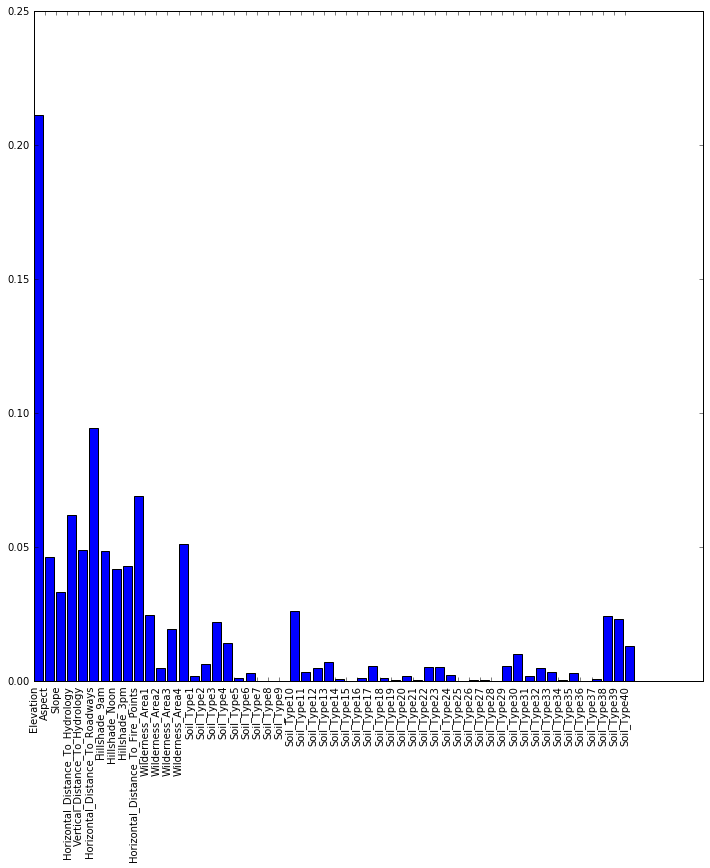

In [129]:
plt.figure(figsize=(12, 12))
importances = model.feature_importances_

plt.bar(left = np.arange(importances.size),height = importances,tick_label = train_set.columns)

plt.setp(plt.xticks()[1],rotation = 90)
plt.show()

In [121]:
np.min(Y), np.max(Y)

(1, 7)

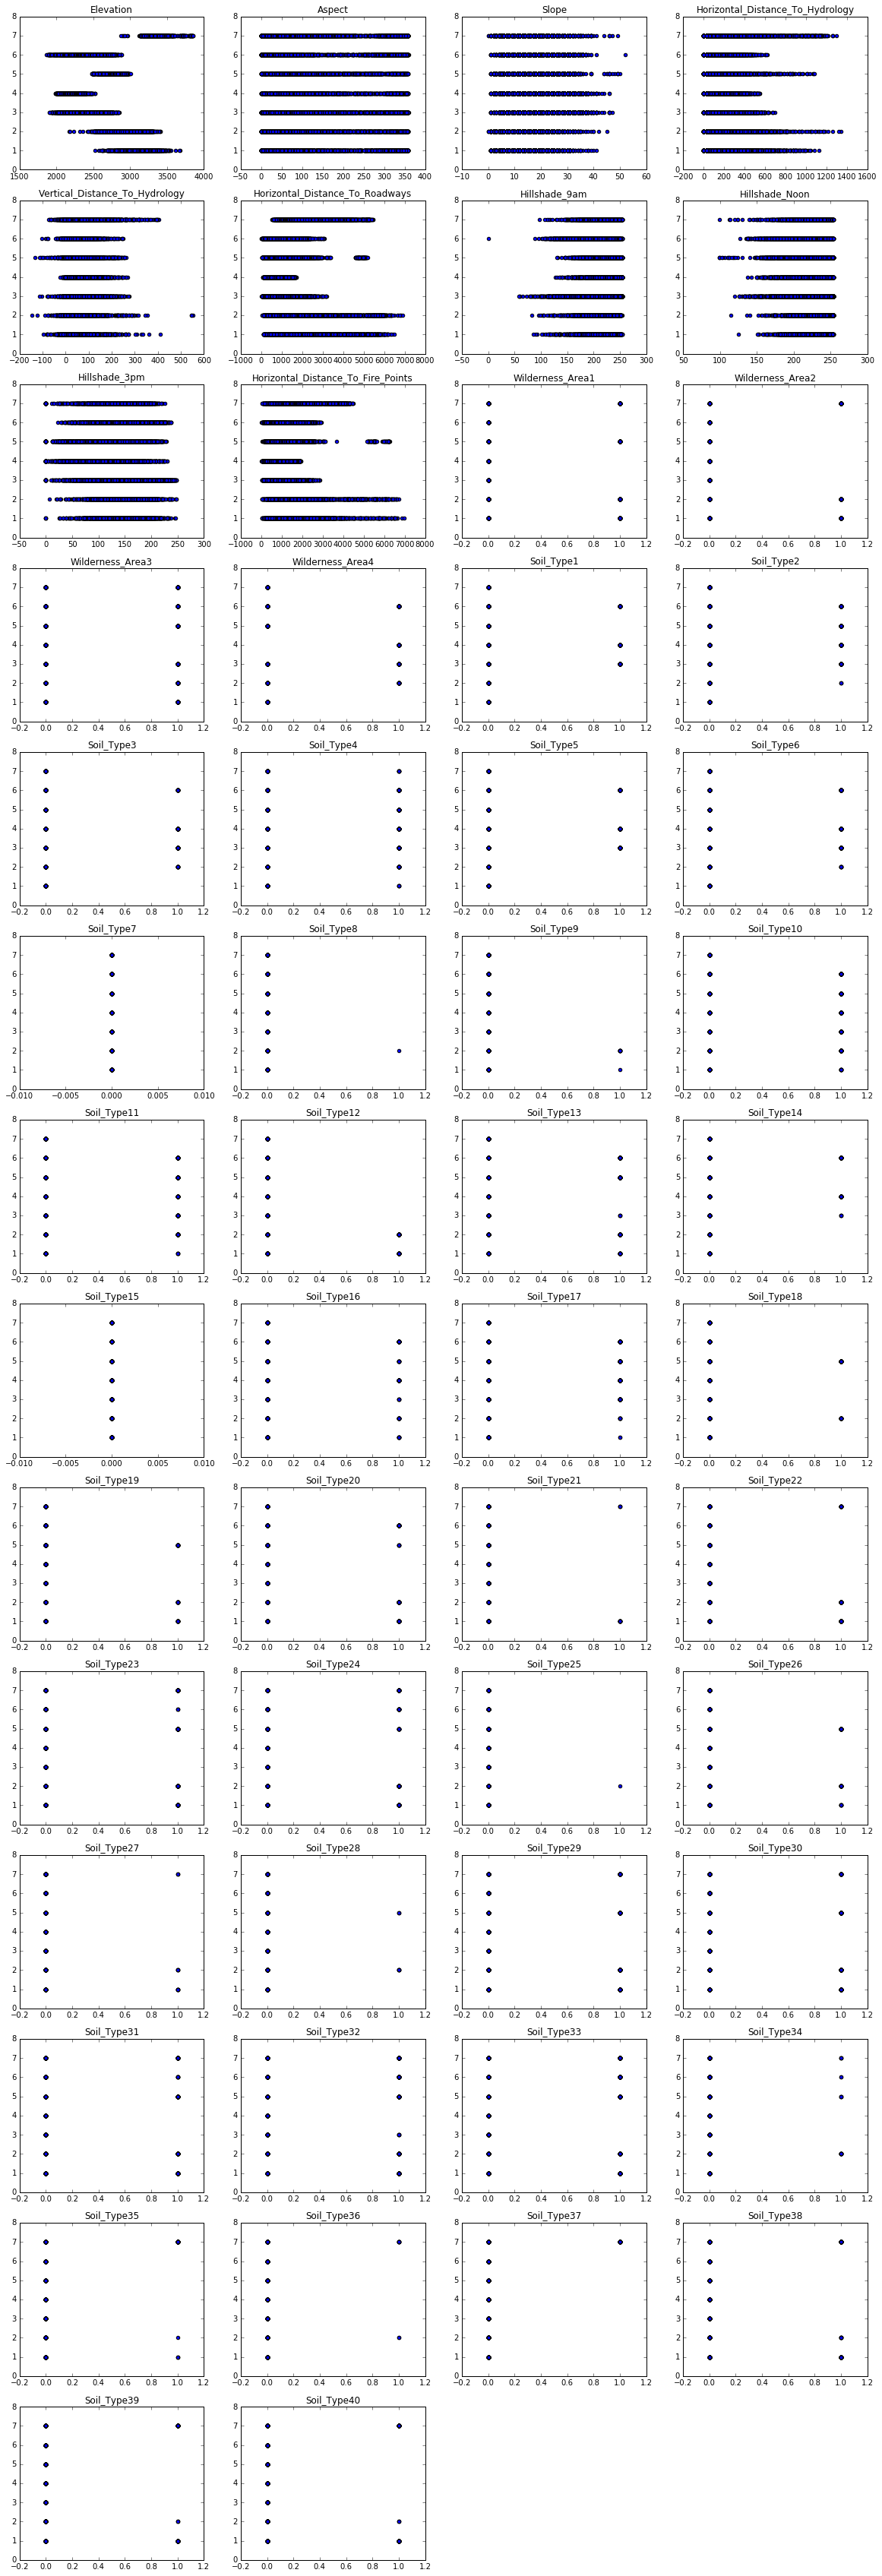

In [143]:
plt.figure(figsize=(20,60))
for i in range(54):
    plt.subplot(14,4,1+i)

    plt.scatter(train_set[train_set.columns[i]],Y)
    plt.title(train_set.columns[i])
    

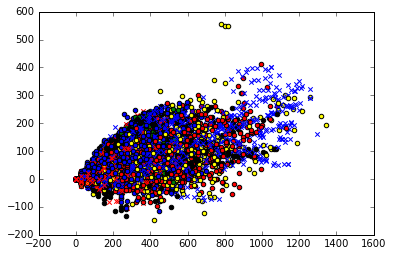

In [35]:
for i in range(Y.size):
    if Y[i] == 1:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'red')
    if Y[i] == 2:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'yellow')
    if Y[i] == 3:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'blue')
    if Y[i] == 4:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'green')
    if Y[i] == 5:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'black')
    if Y[i] == 6:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'red',marker='x')
    if Y[i] == 7:
        plt.scatter(train_set['Horizontal_Distance_To_Hydrology'][i],train_set['Vertical_Distance_To_Hydrology'][i],c = 'blue',marker='x')


In [144]:
test_set = pd.read_csv('test.csv')
Id = test_set['Id']
del test_set['Id']

In [145]:
test1 = adb(base_estimator=rfc(),n_estimators=10)
test1.fit(train_set,Y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [146]:
result1 = test1.predict(test_set)

In [147]:
result1 = pd.DataFrame({'Id':Id,'Cover_Type':result1})
result1 = result1[['Id','Cover_Type']]

In [148]:
result1.to_csv('result1.csv',cols=['Id','Cover_Type'],index=False,header=True)

In [149]:
result1.columns

Index(['Id', 'Cover_Type'], dtype='object')

# Selection des variables

- C'est évidant que les données Aspect et Soil_Type 4 7 et 15 sont inutiles.